# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import klib as kl
from pandas_profiling import ProfileReport
from sklearn.metrics import r2_score , mean_squared_error 
from xgboost import XGBRegressor
import joblib
%matplotlib inline

C:\Users\Eyad\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_test = pd.read_csv('Test.csv')
df_train = pd.read_csv('Train.csv')
df = pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

# Analayze data

In [3]:
print(df.shape)
df.head(5)

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ind,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,NaN


In [4]:
print(df.isnull().sum())
df.describe(include = 'all').T

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
ind                             0
Item_Outlet_Sales            5681
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,FDY28,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765.0,NaN,NaN,NaN,12.792854,4.652502,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204.0,NaN,NaN,NaN,0.065953,0.051459,0.0,0.027036,0.054021,0.094037,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204.0,NaN,NaN,NaN,141.004977,62.086938,31.29,94.012,142.247,185.8556,266.8884
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204.0,NaN,NaN,NaN,1997.830681,8.371664,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  ind                        14204 non-null  object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage

In [6]:
for i in df.columns:
    if df[i].dtype != 'float64':
        print('Unique in', i ,':',df[i].unique())

Unique in Item_Identifier : ['FDW58' 'FDW14' 'NCN55' ... 'FDL10' 'FDX04' 'FDU19']
Unique in Item_Fat_Content : ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Unique in Item_Type : ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Unique in Outlet_Identifier : ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Unique in Outlet_Establishment_Year : [1999 2007 1998 1985 1997 2009 2002 1987 2004]
Unique in Outlet_Size : ['Medium' nan 'Small' 'High']
Unique in Outlet_Location_Type : ['Tier 1' 'Tier 2' 'Tier 3']
Unique in Outlet_Type : ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
Unique in ind : ['test' 'train']


In [7]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [8]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

# Data Cleaning - 1

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
ind                             0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
df['Item_Identifier'].str[0:2].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [11]:
df.loc[df['Item_Identifier'].str.contains('FD'), 'Item_Identifier'] = 'FD'
df.loc[df['Item_Identifier'].str.contains('NC'), 'Item_Identifier'] = 'NC'
df.loc[df['Item_Identifier'].str.contains('DR'), 'Item_Identifier'] = 'DR'
df['Item_Identifier'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [12]:
df.drop('Outlet_Identifier' , axis = 1,inplace=True)
df = kl.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  category
 1   Item_Weight                14204 non-null  float32 
 2   Item_Fat_Content           14204 non-null  category
 3   Item_Visibility            14204 non-null  float32 
 4   Item_Type                  14204 non-null  category
 5   Item_MRP                   14204 non-null  float32 
 6   Outlet_Establishment_Year  14204 non-null  int16   
 7   Outlet_Size                14204 non-null  category
 8   Outlet_Location_Type       14204 non-null  category
 9   Outlet_Type                14204 non-null  category
 10  ind                        14204 non-null  category
 11  Item_Outlet_Sales          8523 non-null   float32 
dtypes: category(7), float32(4), int16(1)
memory usage: 459.3 KB


In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].unique()

['Low Fat', 'Regular']
Categories (2, object): ['Low Fat', 'Regular']

In [14]:
df['Outlet_Size'].unique()

['Medium', 'Small', 'High']
Categories (3, object): ['High', 'Medium', 'Small']

In [15]:
dup = df.duplicated()
print(dup.sum())

0


In [16]:
df['Item_Visibility'].replace(0 , np.nan , inplace=True)
df['Item_Visibility'].min()

0.0035746979992836714

In [17]:
df['Item_Visibility'].fillna(df['Item_Visibility'].mean() , inplace= True)

In [18]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ind,Item_Outlet_Sales
0,FD,20.75,Low Fat,0.007565,Snack Foods,107.862198,1999,Medium,Tier 1,Supermarket Type1,test,NaN
1,FD,8.30,Regular,0.038428,Dairy,87.319801,2007,Medium,Tier 2,Supermarket Type1,test,NaN


# EDA

In [19]:
profile = ProfileReport(df)

In [20]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

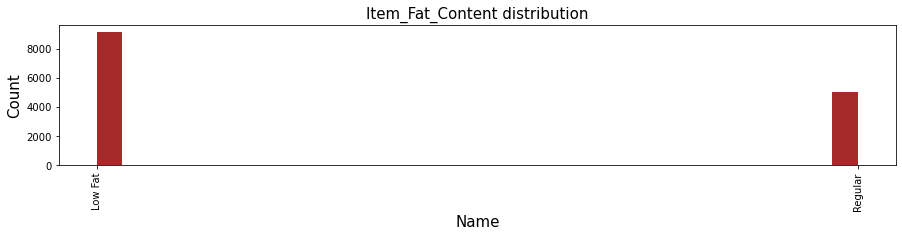

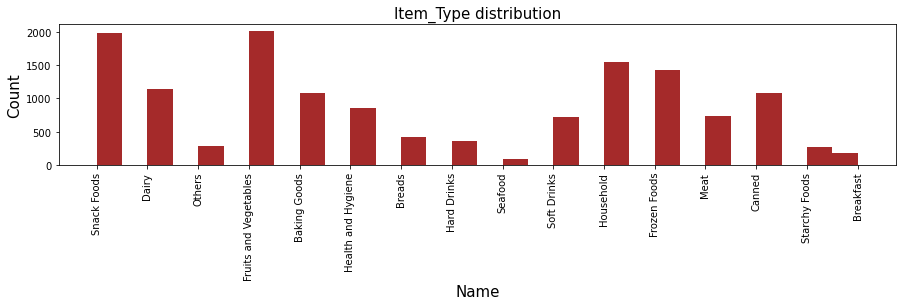

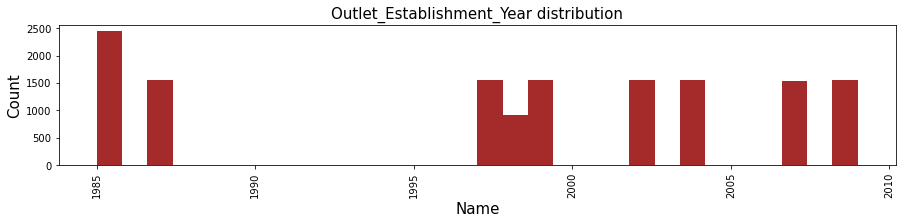

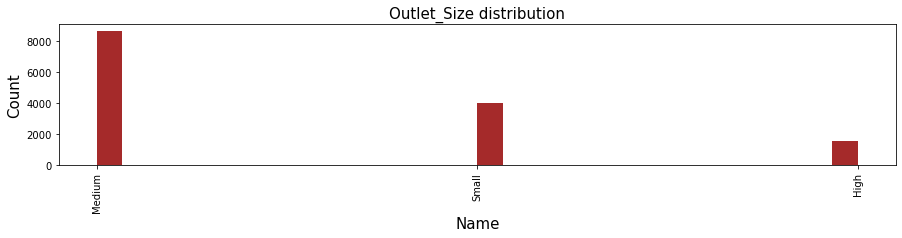

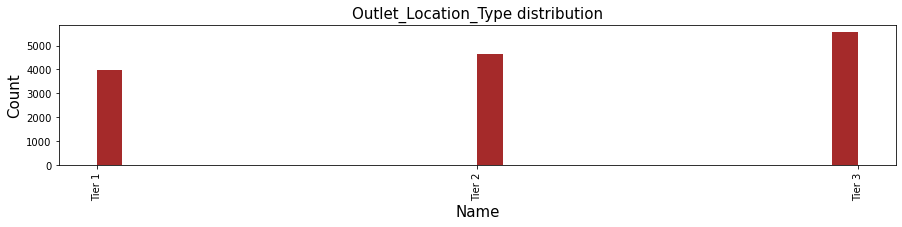

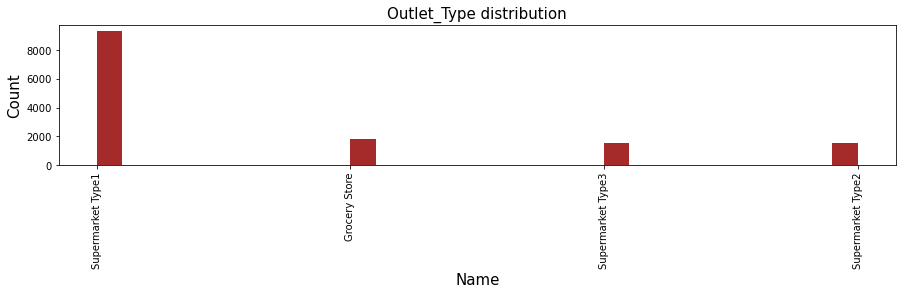

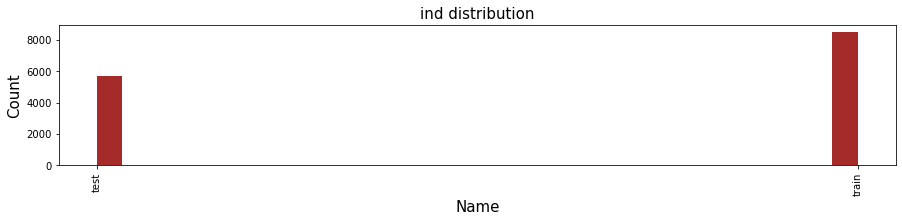

In [21]:
for i in df.columns[1:]:
    if df[i].dtype != 'float32':
        font ={'size':15 , 'weight': '12'}
        fig=plt.figure(figsize=(15,15))
        ax = fig.add_subplot(5,1,1)
        ax.hist(df[i],bins = 30,color='brown')
        plt.title('{} distribution'.format(i),fontdict=font)
        plt.xlabel('Name',fontdict=font)
        plt.xticks(rotation = 90)
        plt.ylabel('Count',fontdict=font)
        plt.show()

In [22]:
OL= df.groupby(['Outlet_Size','Outlet_Location_Type','Outlet_Type'])
OL.size()

Outlet_Size  Outlet_Location_Type  Outlet_Type      
High         Tier 1                Grocery Store           0
                                   Supermarket Type1       0
                                   Supermarket Type2       0
                                   Supermarket Type3       0
             Tier 2                Grocery Store           0
                                   Supermarket Type1       0
                                   Supermarket Type2       0
                                   Supermarket Type3       0
             Tier 3                Grocery Store           0
                                   Supermarket Type1    1553
                                   Supermarket Type2       0
                                   Supermarket Type3       0
Medium       Tier 1                Grocery Store           0
                                   Supermarket Type1    1550
                                   Supermarket Type2       0
                                

# Encoding

In [23]:
# one hot: Item_Identifier , Item_Fat_Content , Item_Type ,Outlet_Type
# ordinal: Outlet_Size , Outlet_Location_Type

In [24]:
le = LabelEncoder()

In [25]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df[['Outlet_Location_Type', 'Outlet_Size']].head(2)

,Outlet_Location_Type,Outlet_Size
0,0,1
1,1,1


In [26]:
df = pd.get_dummies( df, columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type' , 'Outlet_Type'])

In [27]:
df.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,ind,Item_Outlet_Sales,Item_Identifier_DR,Item_Identifier_FD,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.75,0.007565,107.862198,1999,1,0,test,NaN,0,1,...,0,0,0,1,0,0,0,1,0,0
1,8.30,0.038428,87.319801,2007,1,1,test,NaN,0,1,...,0,0,0,0,0,0,0,1,0,0


# Splitting data

In [28]:
df_test, df_train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [29]:
df_test.shape , df_train.shape

((5681, 33), (8523, 33))

In [30]:
X = df_train.drop(['Item_Outlet_Sales','ind'] , axis = 1)
y = df_train['Item_Outlet_Sales']

In [31]:
X.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.809204,1999,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.269199,2009,1,2,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
y.head(2)

0    3735.137939
1     443.422791
Name: Item_Outlet_Sales, dtype: float32

In [33]:
X_train , X_test , y_train , y_test = train_test_split( X , y ,test_size= 0.15 ,random_state= 44)

# Scaling

In [34]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train) , columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),  columns=X_train.columns)

In [35]:
X_train_scaled.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-1.444489,-0.008394,1.377109,0.133644,-0.288907,-1.372308,-0.325247,0.630806,-0.482723,-1.365006,...,-0.230015,-0.140382,-0.085851,-0.400656,-0.236594,-0.132509,-0.383076,0.732375,-0.352592,-0.352592
1,1.395548,-0.377681,-0.588687,0.491942,-0.288907,-0.140462,-0.325247,-1.585274,2.071582,0.732598,...,-0.230015,-0.140382,-0.085851,-0.400656,-0.236594,-0.132509,-0.383076,0.732375,-0.352592,-0.352592


In [36]:
X_test_scaled.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.063380,-0.875827,-0.853195,0.133644,-0.288907,-1.372308,-0.325247,0.630806,-0.482723,-1.365006,...,-0.230015,-0.140382,-0.085851,-0.400656,-0.236594,-0.132509,-0.383076,0.732375,-0.352592,-0.352592
1,-0.134798,-0.008394,-1.344549,-1.299546,-1.968556,1.091384,-0.325247,0.630806,-0.482723,-1.365006,...,-0.230015,-0.140382,-0.085851,2.495905,-0.236594,-0.132509,-0.383076,0.732375,-0.352592,-0.352592


# Linear Regression Model , Predict

In [37]:
LRModel = LinearRegression()
LRModel.fit(X_train_scaled,y_train)

LinearRegression()

In [38]:
y_pred = LRModel.predict(X_test_scaled)

In [39]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 58.357%
mean squared error is 1153134.624819


# Decision Tree Model , Predict

In [40]:
DTModel = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
DTModel.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [41]:
y_pred = DTModel.predict(X_test_scaled)

In [42]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 58.919%
mean squared error is 1137575.425446


# Random Forest Model , Predict

In [43]:
RFModel = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=50)
RFModel.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=50)

In [44]:
y_pred = RFModel.predict(X_test_scaled)

In [45]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 62.587%
mean squared error is 1036005.882898


In [46]:
RFModel.predict(X_test_scaled[5:10])

array([2503.30810395, 1594.20378291, 2026.51687669, 1594.20378291,
        228.2896143 ])

In [47]:
y_test[5:10]

2355    4653.941895
6212    2143.875977
6283    1743.064453
4686    1619.225586
1754     202.403198
Name: Item_Outlet_Sales, dtype: float32

# Ridge Regression

In [48]:
RRModel = Ridge(alpha=0.0005)
RRModel.fit(X_train_scaled, y_train)

Ridge(alpha=0.0005)

In [49]:
y_pred = RRModel.predict(X_test_scaled)

In [50]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 58.358%
mean squared error is 1153107.344975


# Hyper parameter tuning using XGB

In [51]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train_scaled, y_train)

C:\Users\Eyad\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
y_pred = XGBModel.predict(X_test_scaled)

In [53]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 55.301%
mean squared error is 1237743.750000


# Hyper parameter tuning using GradientBoostingRegressor

In [54]:
GBRModel = GradientBoostingRegressor(learning_rate=0.1 , n_estimators=100)
GBRModel.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [55]:
y_pred = GBRModel.predict(X_test_scaled)

In [56]:
print('r2 score is: %.3f' %(r2_score(y_test,y_pred)*100)+'%')
print('mean squared error is %f' %(mean_squared_error(y_test,y_pred)))

r2 score is: 62.438%
mean squared error is 1040135.458018


# Predicting test data

In [ ]:
RFModel = RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=50)
RFModel.fit(X_train_scaled, y_train)
test = df_test.drop(['ind','Item_Outlet_Sales'], axis = 1)
Predected_Price = RFModel.predict(test)
results = pd.DataFrame(predections)
results.index = test.index
results.columns = ["Predected_Price"]
results.to_csv("predections.csv")

# Model Saving

In [57]:
joblib.dump(RFModel , r"C:\Users\Eyad\Desktop\AI course,Data Science\Technocolabs\Technocolabs-mini-project\BigMartRFModel.sav")

['C:\\Users\\Eyad\\Desktop\\AI course,Data Science\\Technocolabs\\Technocolabs-mini-project\\BigMartRFModel.sav']

In [58]:
joblib.load(r"C:\Users\Eyad\Desktop\AI course,Data Science\Technocolabs\Technocolabs-mini-project\BigMartRFModel.sav")

RandomForestRegressor(max_depth=5, min_samples_leaf=50)